#  IAPWS-IF97 Libraries

## 1 Introduction to IAPWS-IF97

http://www.iapws.org/relguide/IF97-Rev.html

This formulation is recommended for industrial use (primarily the steam power industry) for the calculation of thermodynamic properties of ordinary water in its fluid phases, including vapor-liquid equilibrium. 

The release also contains "backward" equations to allow calculations with certain common sets of independent variables to be made without iteration; these equations may also be used to provide good initial guesses for iterative solutions. 

Since the release was first issued, it has been supplemented by several additional "backward" equations that are available for use if desired; these are for p(h,s) in Regions 1 and 2, T(p,h), v(p,h), T(p,s), v(p,s) in Region 3, p(h,s) in Region 3 with auxiliary equations for independent variables h and s, and v(p,T) in Region 3. 

![if97](./img/If97.jpg)

## 2 IAPWS-IF97 Libraries  

### 2.1  IAPWS in Python
  
https://github.com/jjgomera/iapws
    
**dependences:** Numpy,scipy: library with mathematic and scientific tools  

```bash
python -m pip install iapws
```

In [ ]:
from iapws import IAPWS97
sat_steam=IAPWS97(P=1,x=1)                # saturated steam with known P,x=1
sat_liquid=IAPWS97(T=370, x=0)            #saturated liquid with known T,x=0
steam=IAPWS97(P=2.5, T=500)               # steam with known P and T(K)
print(sat_steam.h, sat_liquid.h, steam.h) #calculated enthalpies

### 2.2 SEUIF97  

https://github.com/PySEE/SEUIF97

The high-speed shared library is provided for developers to calculate the properties of water and steam where the direct IAPWS-IF97 implementation may be unsuitable because of their computing time consumption, such as Computational Fluid Dynamics (CFD), heat cycle calculations, simulations of non-stationary processes, and real-time process optimizations.

Through the high-speed library, the results of the IAPWS-IF97 are accurately produced at about 3 times computational speed than the repeated squaring method for fast computation of large positive integer powers.

The library is written in ANSI C for faster, smaller binaries and better compatibility for accessing the DLL/SO from different C++ compilers.

For Windows and Linux users, the convenient binary library and APIs are provided.

* The shared library: Windows(32/64): `libseuif97.dll`; Linux(64): `libseuif97.so`

* The binding API: Python, C/C++, Microsoft Excel VBA, MATLAB,Java, Fortran, C# 

#### 2.2.1 Python API:seuif97.py

Functions of `water and steam properties`, `exerg`y analysis and the `thermodynamic process of steam turbine` are provided in **SEUIF97**

##### 2.2.1.1  Functions of water and steam properties

Using SEUIF97, you can set the state of steam using various pairs of know properties to get any output properties you wish to know, including in the `30 properties in libseuif97`

The following input pairs are implemented: 

```c
(p,t) (p,h) (p,s) (p,v)

(t,h) (t,s) (t,v) 

(h,s) 

(p,x)  (t,x) 
```

The two type functions are provided in the seuif97 pacakge: 
    
 * ??2?(in1,in2) , e.g: ```h=pt2h(p,t)```
 * ??(in1,in2,propertyID),  , e.g: ```h=pt(p,t,4)```,  the propertyID h is 4


Python API：seuif97.py

```python
from ctypes import *

flib = windll.LoadLibrary('libseuif97.dll')
prototype = WINFUNCTYPE(c_double, c_double, c_double, c_int)

# ---(p,t) ----------------

def pt(p, t, pid):
    f = prototype(("seupt", flib),)
    result = f(p, t, pid)
    return result


def pt2h(p, t):
    f = prototype(("seupt", flib),)
    result = f(p, t, 4)
    return result
```

In [10]:
import seuif97

p, t = 16.10, 535.10

# ??2?(in1,in2)
h = seuif97.pt2h(p, t)
s = seuif97.pt2s(p, t)
v = seuif97.pt2v(p, t)

print("(p,t),h,s,v:\n {:>.2f}\t {:>.2f}\t {:>.2f}\t {:>.3f}\t {:>.4f}".format(p, t, h, s, v))

# ??(in1,in2,propertyid)
t = seuif97.ph(p, h, 1)
s = seuif97.ph(p, h, 5)
v = seuif97.ph(p, h, 3)

print("(p,h),t,s,v:\n {:>.2f}\t {:>.2f}\t {:>.2f}\t {:>.3f}\t {:>.4f}".format(p, h, t, s, v))

(p,t),h,s,v:
 16.10	 535.10	 3397.27	 6.428	 0.0206
(p,h),t,s,v:
 16.10	 3397.27	 535.10	 6.428	 0.0206


##### 2.2.1.2 Functions of Thermodynamic Process of Steam Turbine

* 1 Isentropic Enthalpy Drop：ishd(pi,ti,pe)

      pi - double,  inlet pressure(MPa); ti - double, inlet temperature(°C)
      pe - double, outlet pressure(MPa)

* 2 Isentropic Efficiency(`0~100`)： ief(pi,ti,pe,te)

      pi - double,  inlet pressure(MPa); ti - double,  inlet temperature(°C)
      pe - double, outlet pressure(MPa); te - double, outlet temperature(°C)

In [17]:
from seuif97 import *

p1=16.1
t1=535.2
p2=3.56
t2=315.1

hdis=ishd(p1,t1,p2) # Isentropic Enthalpy Drop
ef=ief(p1,t1,p2,t2) # Isentropic Efficiency：0-100

# There are a few ways of printing:
print('Isentropic Enthalpy Drop =',hdis,'kJ/kg')
print('Isentropic Enthalpy Drop = {:>6.2f} kJ/kg'.format(hdis))
print('Isentropic Efficiency = %.2f%%'%ef)

Isentropic Enthalpy Drop = 426.2965108499634 kJ/kg
Isentropic Enthalpy Drop = 426.30 kJ/kg
Isentropic Efficiency = 89.46%


## 3 The `print()` built-in function

`print()` built-in function 

```python
print(*objects, sep=' ', end='\n', file=sys.stdout, flush=False)
    # Print objects to the text stream file (default standard output sys.stdout),
    #   separated by sep (default space) and followed by end (default newline).
    #   *objects denotes variable number of positional arguments packed into a tuple
```

There are a few ways of printing:

<b style="color:blue">print()</b> 

prints a `newline` at the end. You need to include argument `end=''` to suppress the newline.

<b style="color:blue">print(str.format())</b> 

https://docs.python.org/3/library/stdtypes.html#str.format

Python 3's new style for formatted string via `str` class member function `str.format()`. 

The string on which this method is called can contain `literal text` or `replacement fields` delimited by braces `{}`.

Each `replacement field` contains either the numeric index of a `positional` argument, or the name of a `keyword` argument, with C-like **format specifiers** beginning with `:` (instead of % in C) such as

* `:4d` for integer,

* `:6.2f` for floating-point number 

* `:5s` for string 

flags such as:

* `<` for left-align

* `>` for right-align 

* `^` for center-align

**print('formatting-string' % args)**

Python 2's `old` style for formatted string using `%` operator. 

The formatting-string could contain C-like format-specifiers, such as 

* `%4d` for integer,

* `%6.2f` for floating-point number, 

* `%8s` for string. 


In [1]:
str1="the default print"
print(str1)
print(str1,end="")
print(str1,end="")

the default print
the default printthe default print

In [2]:
str2="is:"
int1=11
float1=12.6
#  the automatic field numbering
print('The print(str.format()){:<8s} {:^4d} {:>6.2f}'.format(str2,int1,float1))
# a keyword argument and a positional argument
formatters_str='The print(str.format()){ps:<8s} {0:^4d} {1:>6.2f}'
print(formatters_str.format(int1,float1,ps=str2))

The print(str.format())is:       11   12.60
The print(str.format())is:       11   12.60


In [5]:
str3='isdemo'
print('The old style %8s,%4d,%6.2f' %(str3,int1,float1))

The old style   isdemo,  11, 12.60


## 4 Propertiey and Process  Diagram


* [matplotlib.pyplot.xlim](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xlim.html) Get or set the x-limits of the current axes.

* [matplotlib.pyplot.ylim](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.ylim.html) Get or set the y-limits of the current axes.


### 4.1 T-s Diagram

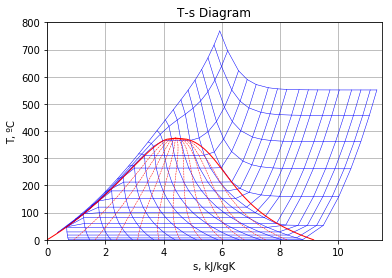

In [3]:
%matplotlib inline
"""
T-s Diagram

1 isoenthalpic lines isoh(200, 3600)kJ/kg
2 isobar lines isop(611.657e-6,100)MPa
3 saturation lines x=0,x=1
4 isoquality lines x(0.1,0.9)

"""
from seuif97 import pt2h, ph2t, ph2s, tx2s
import numpy as np
import matplotlib.pyplot as plt

Pt=611.657e-6
Tc=647.096

plt.figure()
xAxis = "s"
yAxis = "T"
title = {"T": "T, ºC", "s": "s, kJ/kgK"}
plt.title("%s-%s Diagram" % (yAxis, xAxis))
plt.xlabel(title[xAxis])
plt.ylabel(title[yAxis])
plt.xlim(0, 11.5)
plt.ylim(0, 800)
plt.grid()

isoh = np.linspace(200, 3600, 18)
isop = np.array([Pt,0.001,0.002,0.004,0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1.0,
                 2.0, 5.0, 10.0, 20.0, 50.0, 100.0])
for h in isoh:
    T = np.array([ph2t(p, h) for p in isop])
    S = np.array([ph2s(p, h) for p in isop])
    plt.plot(S, T, 'b', lw=0.5)

for p in isop:
    T = np.array([ph2t(p, h) for h in isoh])
    S = np.array([ph2s(p, h) for h in isoh])
    plt.plot(S, T, 'b', lw=0.5)

tc = Tc - 273.15
T = np.linspace(0.01, tc, 100)
for x in np.array([0, 1.0]):
    S = np.array([tx2s(t, x) for t in T])
    plt.plot(S, T, 'r', lw=1.0)

for x in np.linspace(0.1, 0.9, 11):
    S = np.array([tx2s(t, x) for t in T])
    plt.plot(S, T, 'r--', lw=0.5)

plt.show()

### 4.2 H-S Diagram

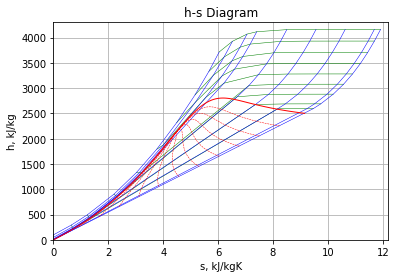

In [4]:
%matplotlib inline
"""
h-s Diagram

1 Calculating Isotherm lines isot(0.0,800)ºC
2 Calculating Isobar lines  isop(611.657e-6, 100)Mpa
3 Calculating saturation lines x=0,x=1
4 Calculating isoquality lines x(0.1,0.9)
"""
from  seuif97 import pt2h,pt2s,tx2s,tx2h
import numpy as np
import matplotlib.pyplot as plt

plt.figure()
xAxis = "s"
yAxis = "h"
title = { "h": "h, kJ/kg", "s": "s, kJ/kgK"}

plt.title("%s-%s Diagram" % (yAxis, xAxis))
plt.xlabel(title[xAxis])
plt.ylabel(title[yAxis])
plt.xlim(0, 12.2)
plt.ylim(0, 4300)
plt.grid()

Pt=611.657e-6

isot = np.array([0, 50, 100, 200, 300, 400, 500, 600, 700, 800])
isop = np.array([Pt,0.001, 0.01, 0.1, 1, 10, 20, 50, 100])
# Isotherm lines in ºC
for t in isot:
    h = np.array([pt2h(p,t) for p in isop])
    s = np.array([pt2s(p,t) for p in isop])
    plt.plot(s,h,'g',lw=0.5)

# Isobar lines in Mpa
for p in isop:
    h = np.array([pt2h(p,t) for t in isot])
    s = np.array([pt2s(p,t) for t in isot])
    plt.plot(s,h,'b',lw=0.5)

tc=647.096-273.15
T = np.linspace(0.1,tc,100)  
# saturation lines
for x in np.array([0,1.0]):
    h = np.array([tx2h(t,x) for t in T])
    s = np.array([tx2s(t,x) for t in T])
    plt.plot(s,h,'r',lw=1.0)

# Isoquality lines
isox=np.linspace(0.1,0.9,11)
for x in isox:
    h = np.array([tx2h(t,x) for t in T])
    s = np.array([tx2s(t,x) for t in T])
    plt.plot(s,h,'r--',lw=0.5)

plt.show()

### 4.3  Steam Turbine Expansion: H-S(Mollier) Diagram


  Inlet(p, t)   16.00MPa 535.00°C 
  Exlet(p, t)   3.56MPa 315.00°C 
The isentropic efficiency: 89.92%


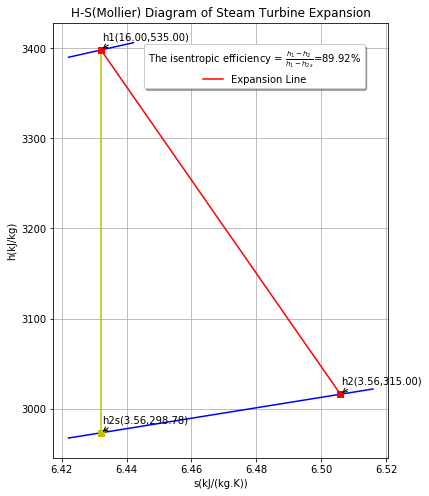

In [2]:
%matplotlib inline
"""
 H-S(Mollier) Diagram of Steam Turbine Expansion

 4 lines:

    1  Isobar line:p inlet
    2  Isobar line:p outlet
    3  isentropic line:  (p inlet ,t inlet h inlet,s inlet), (p outlet,s inlet)
    4  Expansion line: inlet,outlet
"""
import matplotlib.pyplot as plt
import numpy as np
from seuif97 import pt2h, pt2s, ps2h, ph2t, ief, ishd


class Turbine(object):

    def __init__(self, pin, tin, pex, tex):
        self.pin = pin
        self.tin = tin
        self.pex = pex
        self.tex = tex

    def analysis(self):
        self.ef = ief(self.pin, self.tin, self.pex, self.tex)
        self.his = ishd(self.pin, self.tin, self.pex)

        self.hin = pt2h(self.pin, self.tin)
        self.sin = pt2s(self.pin, self.tin)

        self.hex = pt2h(self.pex, self.tex)
        self.sex = pt2s(self.pex, self.tex)

    def expansionline(self):
        sdelta = 0.01

        # 1 Isobar pin
        s_isopin = np.array([self.sin - sdelta, self.sin + sdelta])
        h_isopin = np.array([ps2h(self.pin, s_isopin[0]),
                             ps2h(self.pin, s_isopin[1])])

        # 2 Isobar pex
        s_isopex = np.array([s_isopin[0], self.sex + sdelta])
        h_isopex = np.array([ps2h(self.pex, s_isopex[0]),
                             ps2h(self.pex, s_isopex[1])])

        # 3 isentropic lines
        h_isos = np.array([self.hin, ps2h(self.pex, self.sin)])
        s_isos = np.array([self.sin, self.sin])

        # 4 expansion Line
        h_expL = np.array([self.hin, self.hex])
        s_expL = np.array([self.sin, self.sex])

        # plot lines
        plt.figure(figsize=(6, 8))
        plt.title("H-S(Mollier) Diagram of Steam Turbine Expansion")
        plt.plot(s_isopin, h_isopin, 'b-')  # Isobar line: pin
        plt.plot(s_isopex, h_isopex, 'b-')  # Isobar line: pex

        plt.plot(s_isos, h_isos, 'ys-')  # isoentropic line:
        plt.plot(s_expL, h_expL, 'r-', label='Expansion Line')
        plt.plot(s_expL, h_expL, 'rs')

        _title = 'The isentropic efficiency = ' + \
            r'$\frac{h_1-h_2}{h_1-h_{2s}}$' + '=' + \
            '{:.2f}'.format(self.ef) + '%'

        plt.legend(loc="center", bbox_to_anchor=[
                   0.6, 0.9], ncol=2, shadow=True, title=_title)

        # annotate the inlet and exlet
        txt = "h1(%.2f,%.2f)" % (self.pin, self.tin)
        plt.annotate(txt,
                     xy=(self.sin, self.hin), xycoords='data',
                     xytext=(+1, +10), textcoords='offset points', fontsize=10,
                     arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

        txt = "h2(%.2f,%.2f)" % (self.pex, self.tex)
        plt.annotate(txt,
                     xy=(self.sex, self.hex), xycoords='data',
                     xytext=(+1, +10), textcoords='offset points', fontsize=10,
                     arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
       # annotate h2s
        txt = "h2s(%.2f,%.2f)" % (self.pex, ph2t(self.pex, h_isos[1]))
        plt.annotate(txt,
                     xy=(self.sin, h_isos[1]), xycoords='data',
                     xytext=(+1, +10), textcoords='offset points', fontsize=10,
                     arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

        plt.xlabel('s(kJ/(kg.K))')
        plt.ylabel('h(kJ/kg)')
        plt.grid()
        plt.show()

    def __str__(self):
        result = ('\n  Inlet(p, t)  {:>6.2f}MPa {:>6.2f}°C \n  Exlet(p, t) {:>6.2f}MPa {:>6.2f}°C \nThe isentropic efficiency: {:>5.2f}%'
                  .format(self.pin, self.tin, self.pex, self.tex, self.ef))
        return result


if __name__ == '__main__':
    pin, tin = 16.0, 535.0
    pex, tex = 3.56, 315.0
    tb1 = Turbine(pin, tin, pex, tex)
    tb1.analysis()
    print(tb1)
    tb1.expansionline()

## Reference

* IAPWS.org: http://www.iapws.org/

  * IF97-Rev.pdf: http://www.iapws.org/relguide/IF97-Rev.pdf


* python libray for IAPWS standard calculation of water and steam properties: https://github.com/jjgomera/iapws


* SEUIF97: https://github.com/PySEE/SEUIF97

 * seuif97 Python Package https://pypi.org/project/seuif97/